In [4]:
import boto3
import pandas as pd
bucket='turing-bkt-treinamentos' 
data_key = 'Alunos/Turma_01/BrunoJ/ABT_aluno_BJ.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
df00 = pd.read_csv(data_location,sep=',',encoding='utf-8',error_bad_lines=False)


from sklearn.model_selection import train_test_split

explicativas = df00.drop(['target'], axis=1)
resposta = df00["target"]

x_train, x_test, y_train, y_test = train_test_split(explicativas, resposta, test_size = 0.3, random_state = 0)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

log_loss_train = []
log_loss_test = []
profundidade = []
min_samples_leaf = []
numbernodes = []
pronfund = range(1,20)
minsamplesleaf = range(1,2)

for i in pronfund:
    for j in minsamplesleaf:
        #print('Treinando árvore:',i,j)
        dectree = DecisionTreeClassifier(criterion='gini', 
                                         splitter='best', 
                                         max_depth=i, 
                                         min_samples_split=2, 
                                         min_samples_leaf=j, 
                                         min_weight_fraction_leaf=0.0,
                                         max_features=None, 
                                         random_state=None, 
                                         max_leaf_nodes=None, 
                                         min_impurity_decrease=0.0, 
                                         min_impurity_split=None, 
                                         class_weight=None,
                                         presort=False)
        dectree.fit(x_train, y_train)


        # Treino
        y_pred_dectree_train = dectree.predict(x_train)
        y_score_dectree_train = dectree.predict_proba(x_train)[:,1]

        # Teste
        y_pred_dectree_test = dectree.predict(x_test)
        y_score_dectree_test = dectree.predict_proba(x_test)[:,1]    

        loglosstrain = log_loss(y_train, y_pred_dectree_train, eps=1e-15, normalize=True, sample_weight=None)    
        loglosstest = log_loss(y_test, y_pred_dectree_test, eps=1e-15, normalize=True, sample_weight=None)

        log_loss_train.append(loglosstrain)
        log_loss_test.append(loglosstest)
        profundidade.append(i)
        min_samples_leaf.append(j)
        numbernodes.append(dectree.tree_.node_count)

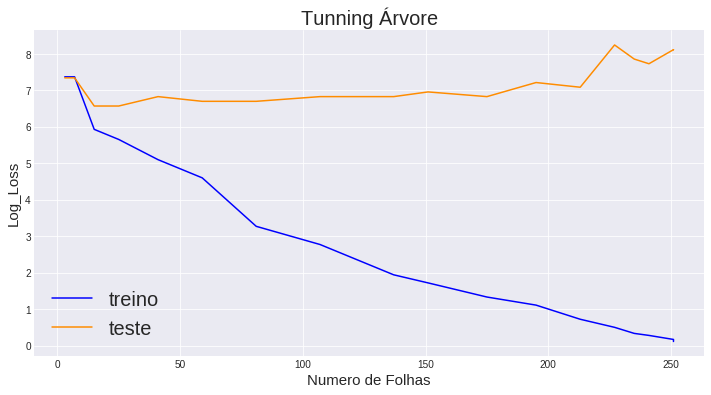

In [7]:
# 3) Gráfico da curva ROC
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,6))

#lw = 2

plt.plot(numbernodes,log_loss_train, color='blue', label='treino' )
plt.plot(numbernodes,log_loss_test, color='darkorange',label='teste')

#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('Numero de Folhas', fontsize=15)
plt.ylabel('Log_Loss', fontsize=15)
plt.legend(loc="lower right")
plt.legend(fontsize=20) 
plt.title('Tunning Árvore', fontsize=20)
plt.show()